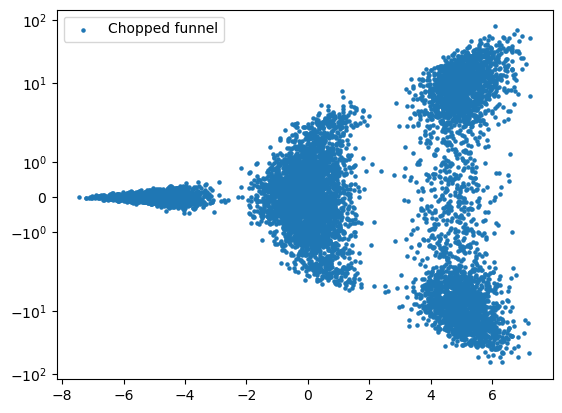

In [1]:
from potentials.synthetic.multimodal_conditionals import ChoppedFunnel
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)
chopped_funnel = ChoppedFunnel(2)
with torch.no_grad():
    x = chopped_funnel.sample(batch_shape=(10000,))

plt.figure()
plt.scatter(x[..., 0], x[..., 1], label='Chopped funnel', s=5)
plt.legend()
# plt.xscale("symlog")
plt.yscale("symlog")
plt.show()

In [2]:
from potentials.base import PosteriorPotential
from potentials.synthetic.rosenbrock import Rosenbrock
from potentials.synthetic.funnel import Funnel
from potentials.synthetic.multimodal import GaussianChain0

n_dim = 2
target1 = PosteriorPotential(
    prior_potential=Funnel(n_dim),
    likelihood_potential=Rosenbrock(n_dim)
)
target2 = PosteriorPotential(
    prior_potential=GaussianChain0(n_dim, weights=torch.tensor([1 / 2, 1 / 2])),
    likelihood_potential=Funnel(n_dim)
)

torch.manual_seed(0)
x = torch.randn(size=(4, n_dim))

print(target1(x))
print(target2(x))

tensor([ 75.3283, 188.2576,  75.9930,   8.2986])
tensor([7.6095, 8.6044, 9.4498, 6.3453])


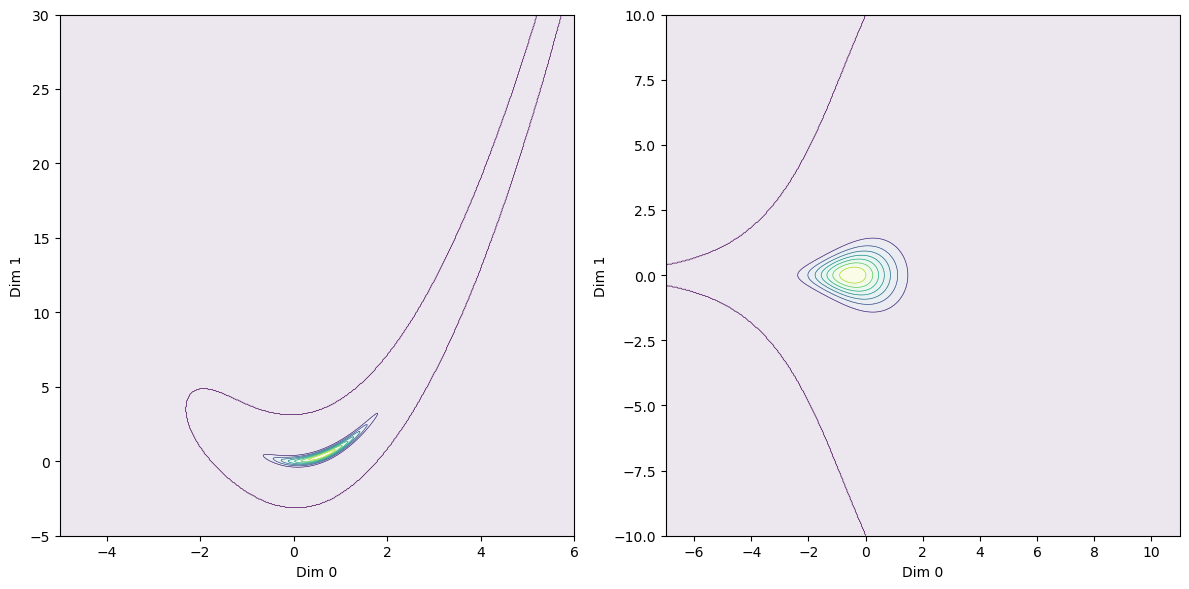

In [3]:
from potentials.utils import plot_2d

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plot_2d(target1, ax1)
plot_2d(target2, ax2, xmin=-7, xmax=11, ymin=-10, ymax=10)
fig.tight_layout()
plt.show()